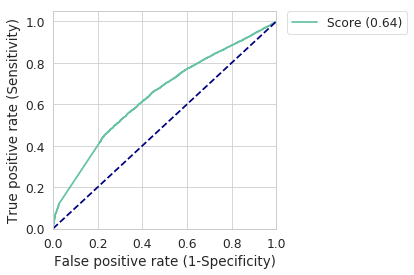

SpearmanrResult(correlation=0.3885479809674715, pvalue=9.523368492390249e-116)

In [2]:
import pandas as pd
import sys
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(root_dir)

import functions

#Datasets
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])


#Deepsol1
deepsol_pET21 = pd.read_csv('Testing_other_tools/deepsol/deepsol1_pET21_NESG.txt', sep='\t', header=None)
deepsol_pET15 = pd.read_csv('Testing_other_tools/deepsol/deepsol1_pET15_NESG.txt', sep='\t', header=None)
deepsol_ecoli = pd.read_csv('Testing_other_tools/deepsol/deepsol1_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
deepsol_pET = pd.concat([deepsol_pET15, deepsol_pET21])


#Rename cols
deepsol_pET = deepsol_pET.rename(columns={0:'Accession', 3:'Score'})
deepsol_ecoli = deepsol_ecoli.rename(columns={0:'JW', 3:'Score'})

deepsol_pET.shape, pET.shape, ecoli_w3110.shape, deepsol_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(deepsol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(deepsol_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [3]:
df_pET.shape, df_ecoli.shape

((12216, 8), (3198, 8))

In [4]:
#cross validation sets
def compute_auc(df, labels):
    preds = df['Score'].values
    fpr, tpr, _ = functions.roc_curve(labels, preds)
    a = functions.auc(fpr, tpr)
    if a < 0.5:
        a = 1 - a
    return a


cv_10 = pd.read_pickle('results/testing_10_with_tag.pkl')
cv_40 = pd.read_pickle('results/testing_40_with_tag.pkl')
cv_90 = pd.read_pickle('results/testing_90_with_tag.pkl')



In [6]:

all_aucs_test_deepsol1_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol1_10.append(compute_auc(temp, labels))
all_aucs_test_deepsol1_10

[0.6490590208937014,
 0.6547031311930243,
 0.6907475259083643,
 0.6081678330406761,
 0.6440333240836508,
 0.5868114805993547,
 0.6369383272026115,
 0.6571175950486297,
 0.6195517723546143,
 0.6920886278795055]

In [7]:
functions.np.mean(all_aucs_test_deepsol1_10), functions.np.std(all_aucs_test_deepsol1_10)

(0.6439218638204134, 0.031641844723862646)

In [5]:

all_aucs_test_deepsol1_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol1_40.append(compute_auc(temp, labels))
all_aucs_test_deepsol1_40

[0.6165697538648358,
 0.6776103818615752,
 0.6706428605763453,
 0.635398410856385,
 0.6265282778277828,
 0.6853465968855025,
 0.6040179599355284,
 0.6727674413256213,
 0.6168816198336062,
 0.6251124796579343]

In [7]:
all_aucs_test_deepsol1_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol1_90.append(compute_auc(temp, labels))
all_aucs_test_deepsol1_90


[0.6520005728821264,
 0.6490041297427515,
 0.670662800408565,
 0.6251489868891538,
 0.6523311449872038,
 0.6291165413533835,
 0.6237654837629728,
 0.6516789720616838,
 0.6544911804613297,
 0.628652414885194]

In [19]:
functions.np.mean(all_aucs_test_deepsol1_40), functions.np.std(all_aucs_test_deepsol1_40)

(0.6430875782625117, 0.028619323399529863)

In [21]:
functions.np.mean(all_aucs_test_deepsol1_90), functions.np.std(all_aucs_test_deepsol1_90)

(0.6436852227434363, 0.015030855159726185)

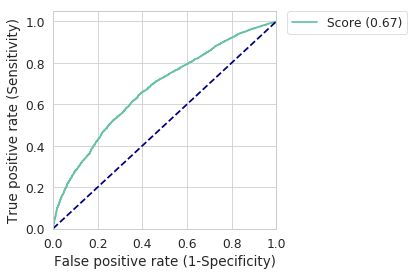

SpearmanrResult(correlation=0.23380470782222829, pvalue=5.817061203361031e-41)

In [8]:
#Deepsol 2

deepsol_pET21 = pd.read_csv('Testing_other_tools/deepsol/deepsol2_pET21_NESG.txt', sep='\t', header=None)
deepsol_pET15 = pd.read_csv('Testing_other_tools/deepsol/deepsol2_pET15_NESG.txt', sep='\t', header=None)
deepsol_ecoli = pd.read_csv('Testing_other_tools/deepsol/deepsol2_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
deepsol_pET = pd.concat([deepsol_pET15, deepsol_pET21])


#Rename cols
deepsol_pET = deepsol_pET.rename(columns={0:'Accession', 3:'Score'})
deepsol_ecoli = deepsol_ecoli.rename(columns={0:'JW', 3:'Score'})

deepsol_pET.shape, pET.shape, ecoli_w3110.shape, deepsol_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(deepsol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(deepsol_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [9]:
all_aucs_test_deepsol2_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol2_10.append(compute_auc(temp, labels))
all_aucs_test_deepsol2_10

[0.6827802348635047,
 0.6811969877130399,
 0.692506181487269,
 0.6385635302694621,
 0.6615388738931913,
 0.6357412041363923,
 0.6606491771244811,
 0.6651154854421641,
 0.6939521237182398,
 0.7162845639878272]

In [10]:
functions.np.mean(all_aucs_test_deepsol2_10), functions.np.std(all_aucs_test_deepsol2_10)

(0.6728328362635572, 0.02403279919693046)

In [10]:
all_aucs_test_deepsol2_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol2_40.append(compute_auc(temp, labels))
all_aucs_test_deepsol2_40

[0.6580043552379617,
 0.6903356205250597,
 0.6861225274593218,
 0.6803417487684729,
 0.6467912416241625,
 0.6980970522589086,
 0.6491268465891877,
 0.6981144279751159,
 0.639075812756858,
 0.6729506365870003]

In [20]:
functions.np.mean(all_aucs_test_deepsol2_40), functions.np.std(all_aucs_test_deepsol2_40)

(0.6718960269782049, 0.020994245519253173)

In [12]:
all_aucs_test_deepsol2_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol2_90.append(compute_auc(temp, labels))
all_aucs_test_deepsol2_90

[0.6975011130726096,
 0.658217696439326,
 0.7065488368627427,
 0.6563144019680948,
 0.694170945333736,
 0.6524686716791981,
 0.6540514850064566,
 0.6536484497660284,
 0.6982817967578376,
 0.6643515439429929]

In [13]:
functions.np.mean(all_aucs_test_deepsol2_90), functions.np.std(all_aucs_test_deepsol2_90)

(0.6735554940829023, 0.021300016585566846)

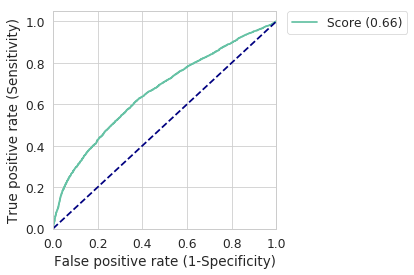

SpearmanrResult(correlation=0.34644352215260077, pvalue=7.482753704456904e-91)

In [11]:
#Deepsol 3

deepsol_pET21 = pd.read_csv('Testing_other_tools/deepsol/deepsol3_pET21_NESG.txt', sep='\t', header=None)
deepsol_pET15 = pd.read_csv('Testing_other_tools/deepsol/deepsol3_pET15_NESG.txt', sep='\t', header=None)
deepsol_ecoli = pd.read_csv('Testing_other_tools/deepsol/deepsol3_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
deepsol_pET = pd.concat([deepsol_pET15, deepsol_pET21])


#Rename cols
deepsol_pET = deepsol_pET.rename(columns={0:'Accession', 3:'Score'})
deepsol_ecoli = deepsol_ecoli.rename(columns={0:'JW', 3:'Score'})

deepsol_pET.shape, pET.shape, ecoli_w3110.shape, deepsol_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(deepsol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(deepsol_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [12]:
all_aucs_test_deepsol3_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol3_10.append(compute_auc(temp, labels))
all_aucs_test_deepsol3_10

[0.6555330181485435,
 0.6816535869996037,
 0.6931916829810035,
 0.6303823645384478,
 0.6711359451073384,
 0.6229581838463626,
 0.6562881148111123,
 0.6432686490762716,
 0.6664286397208212,
 0.6902175406038149]

In [14]:
functions.np.mean(all_aucs_test_deepsol3_10), functions.np.std(all_aucs_test_deepsol3_10)

(0.6611057725833318, 0.022802950155145014)

In [13]:

all_aucs_test_deepsol3_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol3_40.append(compute_auc(temp, labels))
all_aucs_test_deepsol3_40

[0.6339279459156508,
 0.6786530429594273,
 0.6837551373566948,
 0.6577894088669951,
 0.6299114286428643,
 0.6972376151260936,
 0.6588475708035919,
 0.6734315168519944,
 0.6411006047646095,
 0.6539742812470085]

In [16]:
functions.np.mean(all_aucs_test_deepsol3_40), functions.np.std(all_aucs_test_deepsol3_40)

(0.660862855253493, 0.021110727981942592)

In [17]:

all_aucs_test_deepsol3_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(deepsol_pET, on="Accession")
    temp = v.merge(deepsol_pET, on="Accession")[['Score']].copy()
    labels = v.merge(deepsol_pET, on="Accession")['Solubility'].values
    all_aucs_test_deepsol3_90.append(compute_auc(temp, labels))
all_aucs_test_deepsol3_90

[0.6860154491364736,
 0.6296505696832635,
 0.7013269047478601,
 0.6528884374431208,
 0.686111685132493,
 0.639984335839599,
 0.6345831938399732,
 0.6323836210737187,
 0.7019438691708919,
 0.6479746634996041]

In [18]:
functions.np.mean(all_aucs_test_deepsol3_90), functions.np.std(all_aucs_test_deepsol3_90)

(0.6612862729566997, 0.0278116093075536)